In [36]:
import random
import timeit
import matplotlib.pyplot as plt
import math

In [37]:
def bubble_sort(L):
    for i in range(len(L)):
        for j in range(len(L) - 1):
            if L[j] > L[j+1]:
                swap(L, j, j+1)

def swap(L, i, j):
    L[i], L[j] = L[j], L[i]

In [38]:
def bubbleSort2(arr):
    for i in range(len(arr)):
        if (len(arr) - i - 1) <= 0:
            break
        shifted = False
        carry_value = arr[0]
        for j in range(len(arr) - i - 1):
            next_value = arr[j + 1]
            if carry_value <= next_value:
                arr[j] = carry_value
                carry_value = next_value
            else:
                arr[j] = next_value
                shifted = True
        arr[len(arr) - i - 1] = carry_value
        if not shifted:
            return arr
    return arr

In [39]:
lengths = [math.ceil(1.5**x) for x in range(23)]
max_value = 2**30
runs = 5

In [40]:
def create_random_list(length, max_value):
    L = []
    for _ in range(length):
        L.append(random.randint(0, max_value))
    return L

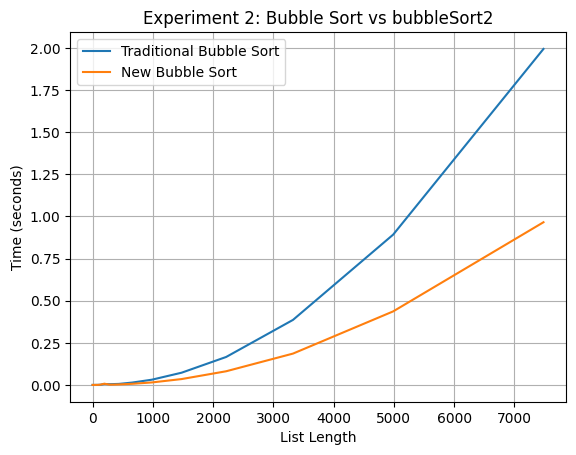

In [41]:
data1, data2 = [], []
for n in lengths:
    t1 = t2 = 0
    
    for _ in range(runs):
        L = create_random_list(n, max_value)

        start = timeit.default_timer()
        bubble_sort(L.copy())
        t1 += timeit.default_timer() - start

        start = timeit.default_timer()
        bubbleSort2(L.copy())
        t2 += timeit.default_timer() - start
    
    data1.append(t1 / runs)
    data2.append(t2 / runs)

plt.plot(lengths, data1, label='Traditional Bubble Sort')
plt.plot(lengths, data2, label='New Bubble Sort')
plt.title("Experiment 2: Bubble Sort vs bubbleSort2")
plt.xlabel('List Length')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.savefig("experiment2.1_graph.png", dpi=300)
plt.show()

In [42]:
def find_min_index(L, n):
    min_index = n
    for i in range(n+1, len(L)):
        if L[i] < L[min_index]:
            min_index = i
    return min_index
    
def selection_sort(L):
    for i in range(len(L)):
        min_index = find_min_index(L, i)
        swap(L, i, min_index)

In [43]:
def selection_sort2(arr):
    i = 0
    j = len(arr) - 1
    while i < j:
        min = arr[i]
        max = arr[i]
        min_index = i
        max_index = i

        for k in range(i, j + 1):
            if arr[k] > max:
                max = arr[k]
                max_index = k
            elif arr[k] < min:
                min = arr[k]
                min_index = k

        arr[i], arr[min_index] = arr[min_index], arr[i]

        if arr[min_index] == max:
            arr[j], arr[min_index] = arr[min_index], arr[j]
        else:
            arr[j], arr[max_index] = arr[max_index], arr[j]

        i += 1
        j -= 1

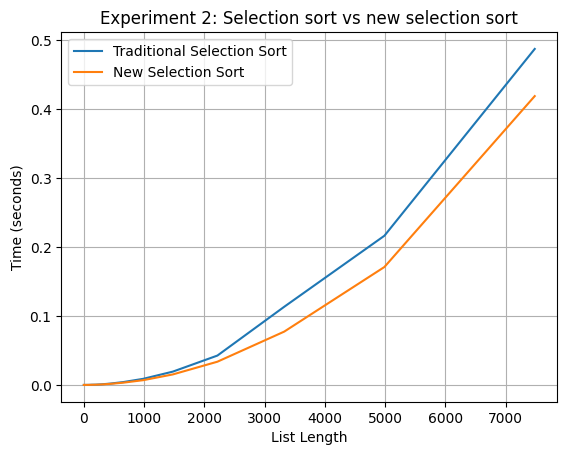

In [44]:
lengths = [math.ceil(1.5**x) for x in range(23)]
max_value = 2**30
runs = 5

data_old, data_new = [], []

for n in lengths:
    t_old = 0
    t_new = 0
    
    for _ in range(runs):
        L = create_random_list(n, max_value)

        start = timeit.default_timer()
        selection_sort(L.copy())
        t_old += timeit.default_timer() - start

        start = timeit.default_timer()
        selection_sort2(L.copy())
        t_new += timeit.default_timer() - start
    
    data_old.append(t_old / runs)
    data_new.append(t_new / runs)

plt.plot(lengths, data_old, label='Traditional Selection Sort')
plt.plot(lengths, data_new, label='New Selection Sort')
plt.title("Experiment 2: Selection sort vs new selection sort")
plt.xlabel('List Length')
plt.ylabel('Time (seconds)')
plt.legend()
plt.grid(True)
plt.savefig("experiment2.2_graph.png", dpi=300)
plt.show()